<center><h2> What factors contribute to the success or failure of start-up companies?</h2>

<center>CST 383-SU23 Intro to Data Science </center>
<center>Professor Ergezer </center>
<center>Steven Forgacs & Nina Khuu  </center>


The dataset that we will be using is [Startup Success/Fail](https://raw.githubusercontent.com/nkhuu2/CST-383-Start-up-Success-Failure/main/big_startup_secsees_dataset.csv)

 Our goal is to analyze the data from start-up companies to determine factors that can help predict the likelihood of success or failure in a startup business by analyzing factors such as business category, funding and the number of funding rounds, geographic area, and the success ratios based on those factors.

Some of the questions that we plan on exploring are:
What is the rate of success and failure in start-up businesses?
Do some business sectors yield a higher success rate than others?
What is the funding threshold that businesses typically need to find success in their sector?
Does geographic region contribute to success/failure rate?
Are funding rounds helpful in achieving success?

This data analysis will help entrepreneurs make informed decisions and minimize chances of failure in their business endeavors.

Ideas for consideration so they don’t get forgotten/lost.
Success/fail by funding, /number of funding rounds,  /geographic region, /state, using 1hot encoding for status, /success ratios, /creation by year, /graphs of failed/success of startups created by year, /ratio us vs the world, /average success rates by country, those for us cities,  /success ratio by category, /funding by category, and the end goal of predicting success/failure.


In [1]:
#Required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from datetime import datetime
from collections import defaultdict

##Data Exploration

In [2]:
#Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nkhuu2/CST-383-Start-up-Success-Failure/main/big_startup_secsees_dataset.csv')
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [3]:
#Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [4]:
df.describe()

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


In [5]:
# see the number of companies by category
df.category_list.value_counts().head(15)

Software               3995
Biotechnology          3615
E-Commerce             1332
Mobile                 1177
Clean Technology       1133
Curated Web            1050
Hardware + Software     932
Health Care             930
Games                   862
Enterprise Software     845
Manufacturing           773
Health and Wellness     770
Advertising             700
Education               585
Semiconductors          501
Name: category_list, dtype: int64

##Data Preprocessing

In [6]:
#Convert funding_total_usd to float values
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

In [7]:
#Get a fraction of NA values by column
df.isna().mean()

permalink            0.000000
name                 0.000015
homepage_url         0.076211
category_list        0.047432
funding_total_usd    0.192638
status               0.000000
country_code         0.104840
state_code           0.128782
region               0.120992
city                 0.120962
funding_rounds       0.000000
founded_at           0.229342
first_funding_at     0.000362
last_funding_at      0.000000
dtype: float64

In [8]:
# Missing values in the dataframe
df.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd    12785
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

In [9]:
# see how much data is missing from funding_total_usd
def check_if_not_num(x):
    try:
      if pd.isna(x):
        return True
      float(x)
      return False
    except ValueError:
        return True

mask = df.funding_total_usd.apply(check_if_not_num)
print('Number of non-numeric string and NaN funding values: ', mask.sum())


Number of non-numeric string and NaN funding values:  12785


We decided to drop these rows. We have not determined a way to impute values that would make sense. Some of these may have not had any outside funding, or the data may have been lost or not reported.

In [10]:
# drop rows that contain NA in the funding_total_usd column
df = df.dropna(subset=['funding_total_usd'])

# drop rows we cannot make a year for
df = df.dropna(subset=['first_funding_at'])

# drop rows that contain NA in the category_list
df = df.dropna(subset=['category_list'])

# impute country_code to USA
df['country_code'].fillna('Unknown')
#df['country_code'] = np.where(df['country_code'] == 'False', df['country_code'], 'Unknown')
print('NA country_code entries: ', df['country_code'].isna().sum())
# getting rid of the columns that we will not be using
df = df[['funding_total_usd', 'status', 'funding_rounds', 'first_funding_at', 'country_code', 'category_list']]

#Get a fraction of NA values by column
df.isna().mean()

NA country_code entries:  4199


funding_total_usd    0.0000
status               0.0000
funding_rounds       0.0000
first_funding_at     0.0000
country_code         0.0798
category_list        0.0000
dtype: float64

In [11]:
def status_result(status):
  if status in ['ipo' , 'acquired']:
    return 'success'
  elif status =='closed':
    return 'fail'
  else:
    return 'operating'

df['status'] = df['status'].apply(status_result)

df = df[df['status'] != 'operating']

df['status'].value_counts()

success    6207
fail       4527
Name: status, dtype: int64

In [12]:
# one hot encoding on status and country_code columns
columns = ['status']

success_df = pd.get_dummies(df[columns], dtype=int)
df = pd.concat([df, success_df], axis=1)

df.info()

# columns = ['country_id']
# country_df = pd.get_dummies(df['country_code'], dtype=int)
# df = pd.concat([df, country_df], axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10734 entries, 15 to 66360
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   funding_total_usd  10734 non-null  float64
 1   status             10734 non-null  object 
 2   funding_rounds     10734 non-null  int64  
 3   first_funding_at   10734 non-null  object 
 4   country_code       9663 non-null   object 
 5   category_list      10734 non-null  object 
 6   status_fail        10734 non-null  int64  
 7   status_success     10734 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 754.7+ KB


In [13]:
# encode country data

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
print(categorical_columns)
df_categorical = df[categorical_columns]
df_categorical.head()
country_column = df_categorical[['country_code']]
encoder = OrdinalEncoder().set_output(transform='pandas')
country_encoded=encoder.fit_transform(country_column)
country_encoded

['status', 'first_funding_at', 'country_code', 'category_list']


,country_code
15,74.0
20,74.0
23,74.0
31,74.0
32,74.0
...,...
66349,19.0
66350,74.0
66352,74.0
66358,46.0


Text(0, 0.5, 'Startup Companies')

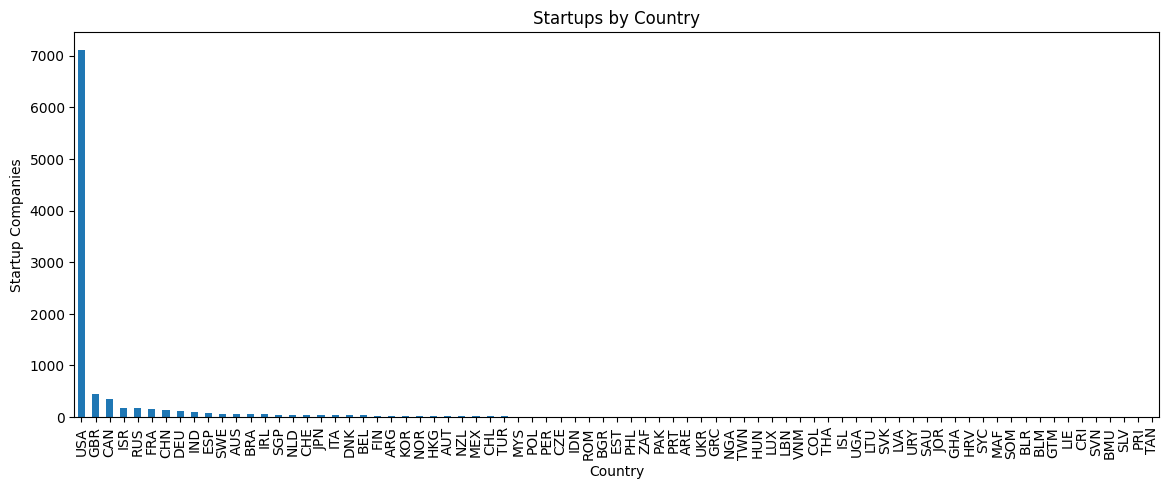

In [14]:
df.country_code.value_counts().plot.bar(figsize=(14,5))
plt.title('Startups by Country')
plt.xlabel('Country')
plt.ylabel('Startup Companies')

In [15]:
# Change category_list to only include one main category and add column of unique category_id's
df['category_list'] = df['category_list'].str.split('|').str[0]
df['category_list'].value_counts().head(15)
cat_list = df.category_list.values.tolist()
temp = defaultdict(lambda: len(temp))
res = [temp[ele] for ele in cat_list]
df['category_id'] = res
df['category_id']

15         0
20         1
23         2
31         3
32         4
        ... 
66349     48
66350    103
66352    238
66358     13
66360     13
Name: category_id, Length: 10734, dtype: int64

In [16]:
# Look at the data by year

df['year'] = pd.to_datetime(df['first_funding_at']).dt.year.astype(int)
#df['year'] = pd.to_datetime(df['year'], format='%Y')


sf_by_year = df.groupby(df['year'])[['status_success',
                                             'status_fail']].sum().rename(columns={'status_success' : 'total_success',
                                                                                   'status_fail' : 'total_fail'})
sf_by_year['total'] = sf_by_year.sum(axis=1)
sf_by_year['success_ratio'] = (sf_by_year['total_success']/sf_by_year['total']).round(2)
sf_by_year['fail_ratio'] = (sf_by_year['total_fail']/sf_by_year['total']).round(2)
sf_by_year['funding_median'] = df.groupby(df['year'])['funding_total_usd'].median()
sf_by_year.sort_values(by='year', ascending=False).head(25)

,total_success,total_fail,total,success_ratio,fail_ratio,funding_median
year,,,,,,
2015,117,440,557,0.21,0.79,5.000000e+05
2014,299,290,589,0.51,0.49,2.300000e+06
2013,343,343,686,0.50,0.50,1.500000e+06
2012,391,467,858,0.46,0.54,1.000000e+06
2011,508,460,968,0.52,0.48,1.641000e+06
2010,609,456,1065,0.57,0.43,3.000000e+06
2009,559,390,949,0.59,0.41,5.300000e+06
2008,455,417,872,0.52,0.48,5.500000e+06
2007,605,376,981,0.62,0.38,9.533642e+06


In [17]:
# Look at the data by category
sf_by_cat = df.groupby(df['category_id'])[['status_success',
                                             'status_fail']].sum().rename(columns={'status_success' : 'total_success',
                                                                                   'status_fail' : 'total_fail'})
sf_by_cat['total'] = sf_by_cat.sum(axis=1)
sf_by_cat['success_ratio'] = (sf_by_cat['total_success']/sf_by_cat['total']).round(2)
sf_by_cat['fail_ratio'] = (sf_by_cat['total_fail']/sf_by_cat['total']).round(2)
sf_by_cat.sort_values(by='total_success', ascending=False).head(25)


,total_success,total_fail,total,success_ratio,fail_ratio
category_id,,,,,
13,811,256,1067,0.76,0.24
4,585,303,888,0.66,0.34
8,330,202,532,0.62,0.38
5,260,76,336,0.77,0.23
2,258,325,583,0.44,0.56
34,226,144,370,0.61,0.39
3,193,62,255,0.76,0.24
17,184,189,373,0.49,0.51
57,169,89,258,0.66,0.34


##Data Visualization

Visualize the total funding issued based on the company status.

<ipython-input-18-7b05aed90e02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues')


<Axes: >

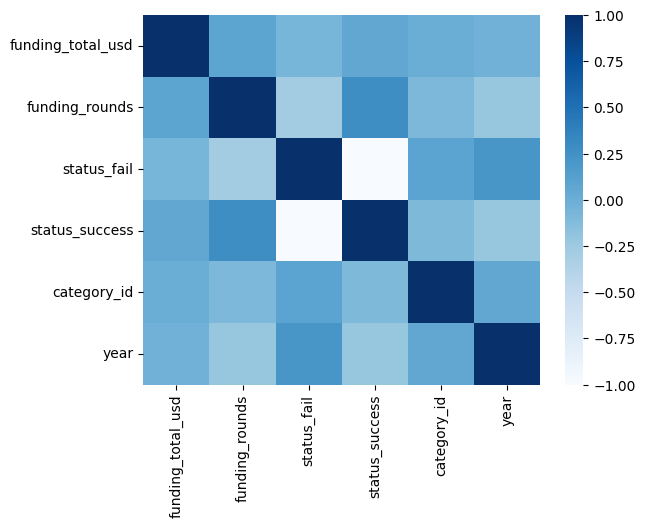

In [18]:
sns.heatmap(df.corr(), cmap='Blues')

Visualization of successes vs failures.

Out of 10734 companies, 6207 or 57.83% succeeded, while 4527 or 42.17% failed.


Text(0.5, 1.0, 'Successes and Failures')

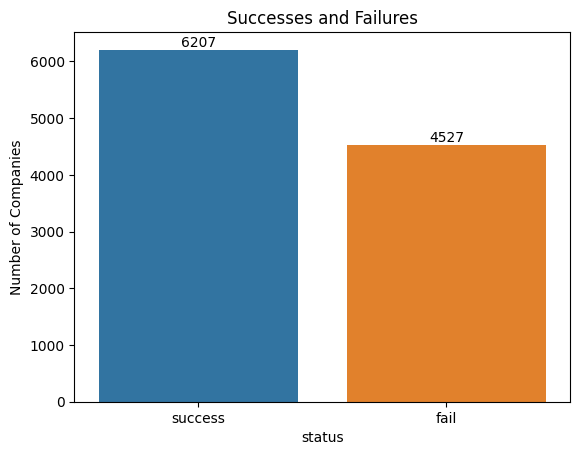

In [19]:
# Success, fail, and operating rates visualization

successes = df['status_success'].value_counts()
total_comps = successes[0] + successes[1]
success_percent = (successes[1] / total_comps)
failure_percent = (successes[0] / total_comps)
print(f'Out of {total_comps} companies, {successes[1]} or {success_percent:.2%} succeeded, while {successes[0]} or {failure_percent:.2%} failed.')
ax = sns.countplot(data=df, x='status')
ax.bar_label(ax.containers[0])
plt.ylabel('Number of Companies')
plt.title('Successes and Failures')

Visualization of the failures and successes by the number of funding rounds.

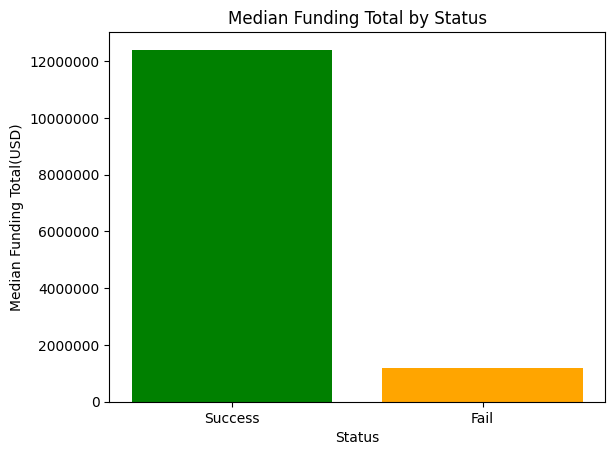

In [20]:
# Median Funding Total by Status

successful_companies = df[df['status_success']==1]
failed_companies = df[df['status_fail']==1]
colors = ['green', 'orange']

plt.bar(['Success', 'Fail'], [successful_companies['funding_total_usd'].median(),
                              failed_companies['funding_total_usd'].median()],color=colors)



#funding_median.plot.bar(color=colors)
plt.title('Median Funding Total by Status')
plt.xlabel('Status')
plt.ylabel('Median Funding Total(USD)')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')


Visualization of the amount funded by funding round.

Text(0, 0.5, 'Count')

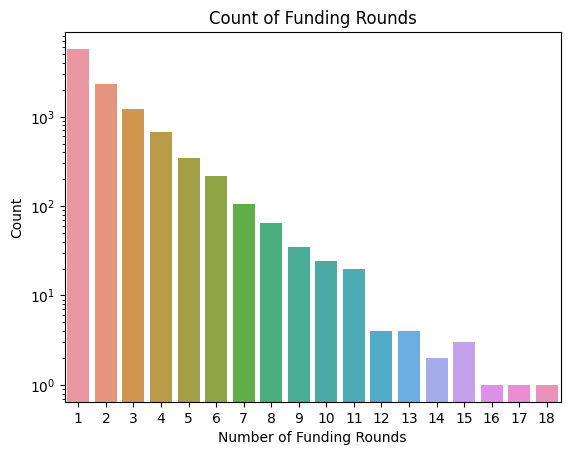

In [21]:
# Bar plot of count of funding rounds
sns.countplot(data=df, x='funding_rounds')
plt.yscale('log')
plt.title('Count of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')

Text(0.5, 0, 'Counts')

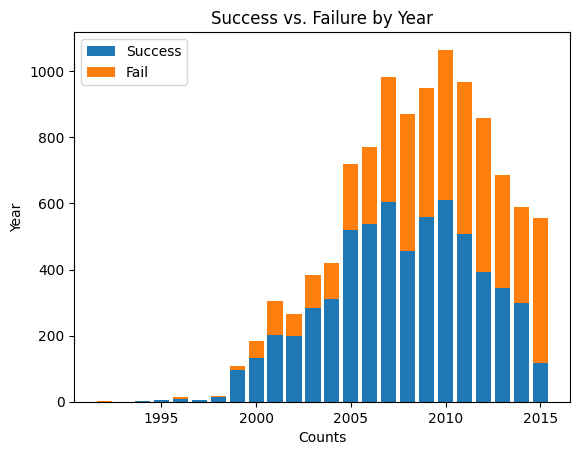

In [22]:
# filter out years prior to 1990 because of low counts
filter_df =  sf_by_year.loc[sf_by_year.index > 1990]

# create stacked bar plot visualizing ratio of success to failure by year
plt.bar(filter_df.index, filter_df['total_success'])
plt.bar(filter_df.index, filter_df['total_fail'], bottom=filter_df['total_success'])

plt.legend(['Success', 'Fail'])
plt.title("Success vs. Failure by Year")
plt.ylabel('Year')
plt.xlabel('Counts')

Text(0.5, 0, 'Counts')

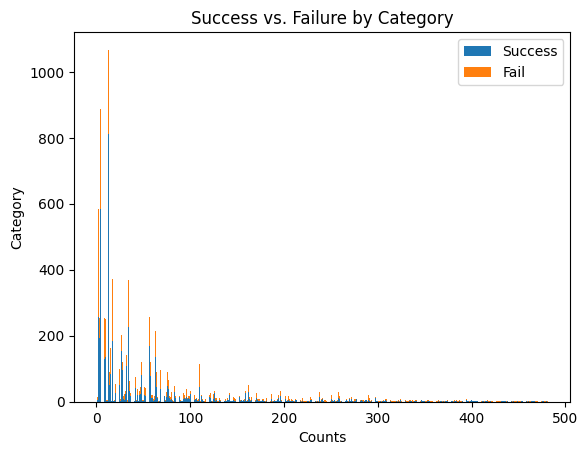

In [23]:
# filter out years prior to 1990 because of low counts
filter_df =  sf_by_cat.loc[sf_by_cat.index > 0]

# create stacked bar plot visualizing ratio of success to failure by year
plt.bar(filter_df.index, filter_df['total_success'])
plt.bar(filter_df.index, filter_df['total_fail'], bottom=filter_df['total_success'])

plt.legend(['Success', 'Fail'])
plt.title("Success vs. Failure by Category")
plt.ylabel('Category')
plt.xlabel('Counts')

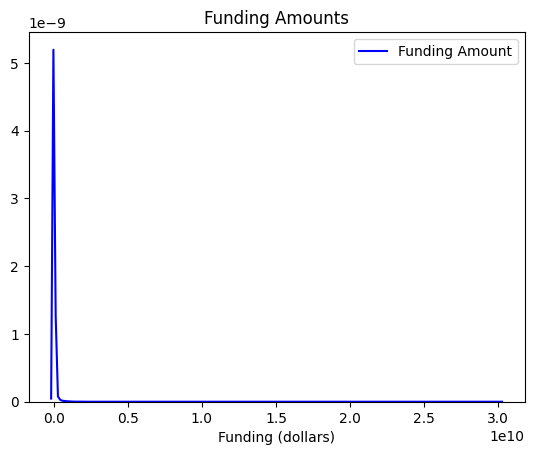

In [24]:
sns.kdeplot(data=df, x=df['funding_total_usd'].astype(int), color='b').set(xlabel='Funding (dollars)', ylabel='', title='Funding Amounts')
plt.legend(labels=['Funding Amount'])

Text(0.5, 1.0, 'Count of Success and Fail by Funding Rounds')

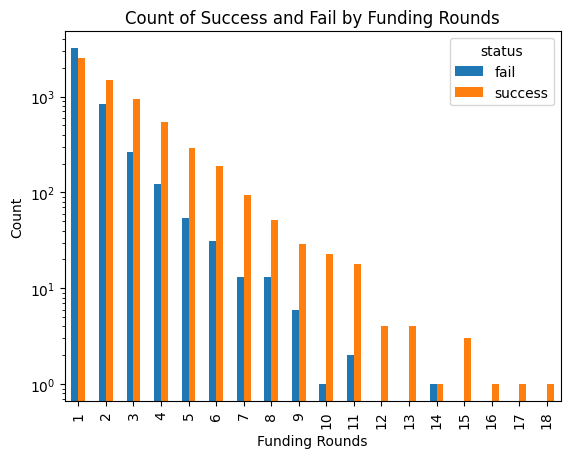

In [25]:
grouped = df.groupby(['funding_rounds', 'status']).size().unstack()
grouped.plot(kind='bar')

plt.yscale('log')
plt.xlabel('Funding Rounds')
plt.ylabel('Count')
plt.title('Count of Success and Fail by Funding Rounds')


#Machine Learning

In [26]:
#function to plot actual vs predicted values
# Inputs:
#   actual - np.array of the actual data values
#   predicted - np.array of predicted data values
#   title - string of the plot title

def plot_actual_predicted(actual, predicted, title):
    plt.title(title)
    plt.ylabel('predicted')
    plt.xlabel('actual')
    plt.scatter(actual, predicted, edgecolors='white')
    a = min(np.min(actual), np.min(predicted))
    b = max(np.max(actual), np.max(predicted))
    plt.plot([a,b], [a,b], linewidth=2, linestyle='dashed', color='black')

RMSE: 0.48
intercept: 0.39
r-squared value: 0.07
coefficients:


array([1.86590225e-10, 8.50009345e-02])

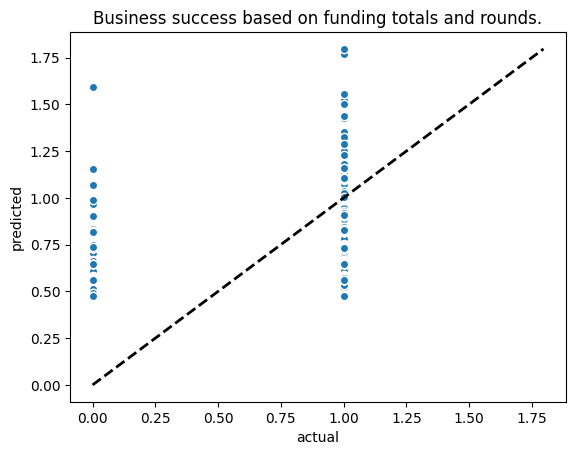

In [27]:
predictors = ['funding_total_usd', 'funding_rounds']
X = df[predictors].values
y = (df['status_success'])

# create training and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=42)

reg = LinearRegression()
reg.fit(X_test, y_test)

predictions = reg.predict(X_test)
plot_actual_predicted( y_test, predictions, 'Business success based on funding totals and rounds.')
rmse = np.sqrt(((y_test - predictions)**2).mean())

print('RMSE: {:.2f}'.format(rmse))
print('intercept: {:.2f}'.format(reg.intercept_))
print('r-squared value: {:.2f}'.format(reg.score(X, y)))
print('coefficients:')
reg.coef_

###KNeighbors Classification

In [28]:
# convert features to NumPy array
predictors = ['funding_total_usd', 'funding_rounds']
X = df[predictors].values
y = (df['status_success'])

# create training and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# KNN classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: ',(accuracy*100).round(2), '%' )


Accuracy:  68.36 %


In [29]:
# convert features to NumPy array
predictors = ['category_id']
X = df[predictors].values
y = (df['status_success'])

# create training and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# KNN classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: ',(accuracy*100).round(2), '%' )


Accuracy:  60.48 %


In [30]:
# convert features to NumPy array
predictors = ['funding_total_usd', 'funding_rounds', 'category_id']
X = df[predictors].values
y = (df['status_success'])

# create training and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# KNN classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: ',(accuracy*100).round(2), '%' )


Accuracy:  68.64 %


1  k = 1  accuracy 63.43%
3  k = 3  accuracy 67.40%
5  k = 5  accuracy 68.64%
7  k = 7  accuracy 69.39%
9  k = 9  accuracy 69.39%
11  k = 11  accuracy 69.76%
13  k = 13  accuracy 70.13%
15  k = 15  accuracy 69.85%
17  k = 17  accuracy 70.07%
19  k = 19  accuracy 69.30%
21  k = 21  accuracy 68.98%
23  k = 23  accuracy 68.67%
25  k = 25  accuracy 68.77%
27  k = 27  accuracy 69.33%
29  k = 29  accuracy 68.89%


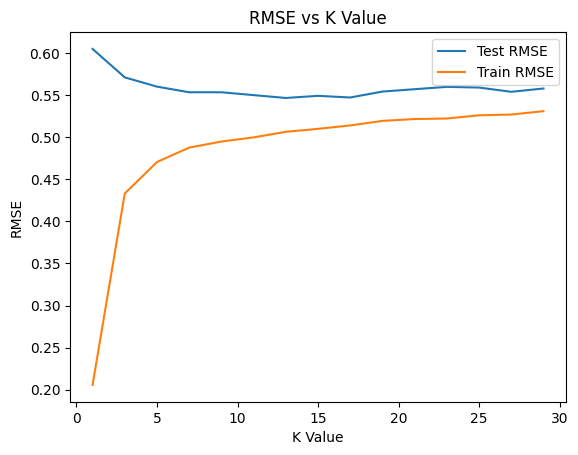

In [31]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

def get_train_test_rmse(regr, X_train, X_test, y_train, y_test):
    # YOUR CODE HERE
    regr.fit(X_train, y_train)
    rmse_tr = rmse(regr.predict(X_train), y_train)
    rmse_te = rmse(regr.predict(X_test), y_test)
    return(rmse_tr, rmse_te)

n = 30
test_rmse = []
train_rmse = []
accuracy_tests = []

ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    regr = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    regr.fit(X_train, y_train)
    rmse_tr, rmse_te = get_train_test_rmse(regr, X_train, X_test, y_train, y_test)
    accuracy = (regr.predict(X_test) == y_test).mean()
    print('k =', k, ' accuracy {:.2%}'.format(accuracy))
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
    accuracy_tests.append(accuracy)

plt.plot(ks, test_rmse)
plt.plot(ks, train_rmse)
plt.xlabel('K Value')
plt.ylabel('RMSE')
plt.title('RMSE vs K Value')
plt.legend(['Test RMSE', 'Train RMSE'])


Text(0.5, 1.0, 'Confusion Matrix')

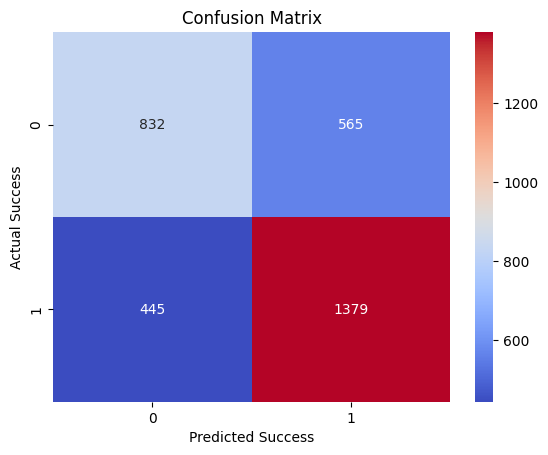

In [32]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

sns.heatmap(conf_matrix, cmap='coolwarm', fmt='d', annot=True)

plt.ylabel('Actual Success')
plt.xlabel('Predicted Success')
plt.title('Confusion Matrix')

###Decision Tree Classification

In [33]:
# create NumPy arrays
X = df[predictors].values
y = df['status_success'].values

# create training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# train the tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

predict = clf.predict(X_test)

rmse = np.sqrt((y_test - predictions)**2).mean()
accuracy = accuracy_score(y_test, predictions)

print('Accuracy: ',(accuracy*100).round(2), '%' )
print('RMSE: ',rmse)


Accuracy:  50.29 %
RMSE:  0.49705060540204904


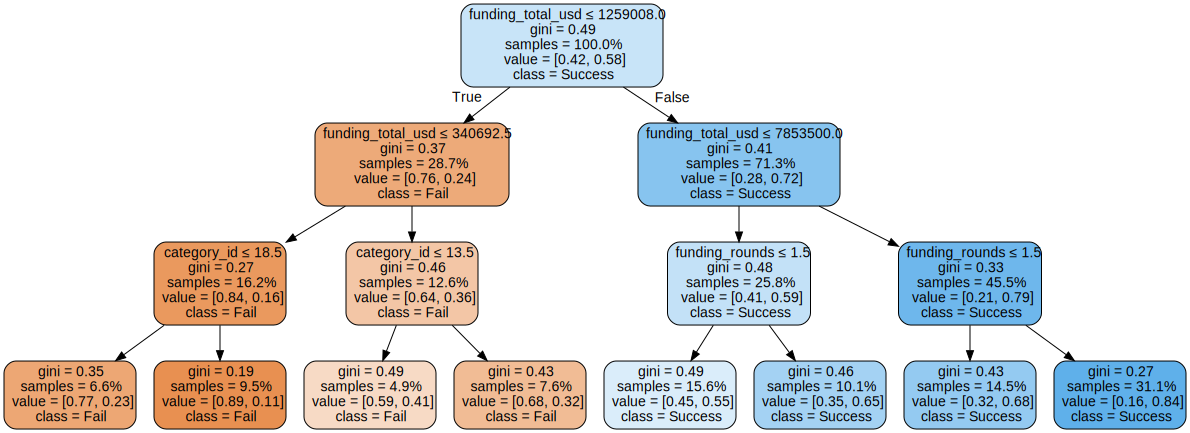

In [34]:
target_names = ['Fail', 'Success']
dot_data = export_graphviz(clf, precision=2,
                     feature_names=predictors,
                     proportion=True,
                     class_names=target_names,
                     filled=True, rounded=True,
                     special_characters=True)

# plot it
graph = graphviz.Source(dot_data)
graph


